### BRSET

* [Dataset](https://physionet.org/content/brazilian-ophthalmological/1.0.0/)

* [Original Paper](https://www.medrxiv.org/content/10.1101/2024.01.23.24301660v1)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings_vlm/brset/'
FILE = 'embeddings_clip.csv'

FILE_PATH = os.path.join(PATH, FILE)

## Get data

In [3]:
df = pd.read_csv(FILE_PATH)
df.drop(columns=['text', 'image_id'], inplace=True)
df.head()

,DR_ICDR,DR_2,DR_3,split,image_embedding_0,image_embedding_1,image_embedding_2,image_embedding_3,image_embedding_4,image_embedding_5,...,text_embedding_502,text_embedding_503,text_embedding_504,text_embedding_505,text_embedding_506,text_embedding_507,text_embedding_508,text_embedding_509,text_embedding_510,text_embedding_511
0,0,0,0,train,0.012998,-0.012632,0.010281,0.016375,-0.040752,-0.018974,...,-0.054316,0.026362,0.062661,0.023066,-0.023967,-0.013421,0.033898,-0.058343,0.027308,0.011322
1,0,0,0,test,0.013524,-0.017406,0.012482,0.012262,-0.039934,-0.022396,...,-0.054454,0.018202,0.061717,0.022467,-0.011161,-0.011376,0.030134,-0.049021,0.021231,0.010651
2,0,0,0,train,0.036357,-0.018087,-0.001801,0.010425,-0.036854,-0.019405,...,-0.055949,0.011358,0.072995,0.030307,-0.011789,-0.011042,0.042255,-0.057926,0.033326,0.018503
3,0,0,0,train,0.022021,-0.011668,0.010509,0.022121,-0.035989,-0.023524,...,-0.055314,0.002594,0.074490,0.034430,-0.000350,-0.007918,0.042707,-0.047150,0.027270,0.020940
4,0,0,0,test,0.018684,-0.010326,0.004721,0.006435,-0.045767,-0.025992,...,-0.052848,0.021930,0.068045,0.027663,-0.020903,-0.012616,0.037164,-0.051632,0.033358,0.013019


## Data Perparation

In [4]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'DR_2'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (13012, 1028)
Test Shape: (3254, 1028)


### Models

In [5]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if label_columns == 'DR_2':
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 0.50 MB
The number of parameters of the model are: 131585


STAGE:2024-02-09 05:10:19 44475:44475 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/30 - Test Accuracy: 0.9557, macro-f1: 0.7418
Epoch 1/30 - Training Time: 1.12 seconds | Inference Time: 0.23 seconds
Epoch 2/30 - Test Accuracy: 0.9674, macro-f1: 0.8337
Epoch 2/30 - Training Time: 1.13 seconds | Inference Time: 0.23 seconds
Epoch 3/30 - Test Accuracy: 0.9671, macro-f1: 0.8463
Epoch 3/30 - Training Time: 0.87 seconds | Inference Time: 0.25 seconds
Epoch 4/30 - Test Accuracy: 0.9650, macro-f1: 0.8138
Epoch 4/30 - Training Time: 0.95 seconds | Inference Time: 0.25 seconds
Epoch 5/30 - Test Accuracy: 0.9708, macro-f1: 0.8682
Epoch 5/30 - Training Time: 0.93 seconds | Inference Time: 0.26 seconds
Epoch 6/30 - Test Accuracy: 0.9720, macro-f1: 0.8750
Epoch 6/30 - Training Time: 0.92 seconds | Inference Time: 0.24 seconds
Epoch 7/30 - Test Accuracy: 0.9696, macro-f1: 0.8460
Epoch 7/30 - Training Time: 0.89 seconds | Inference Time: 0.28 seconds
Epoch 8/30 - Test Accuracy: 0.9708, macro-f1: 0.8695
Epoch 8/30 - Training Time: 0.91 seconds | Inference Time: 0.26 seconds


STAGE:2024-02-09 05:11:02 44475:44475 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-09 05:11:02 44475:44475 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         9.93%        3.323s        52.56%       17.590s       2.874ms      -1.49 Gb      -1.50 Gb          6120  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        39.38%       13.177s        40.01%       13.387s       1.736ms       1.86 Gb       1.86 Gb          7710  
                              Optimizer.step#AdamW.step         6.91%        2.311s        21.27%        7.116s       1.163ms       1.00 Mb      -5.96

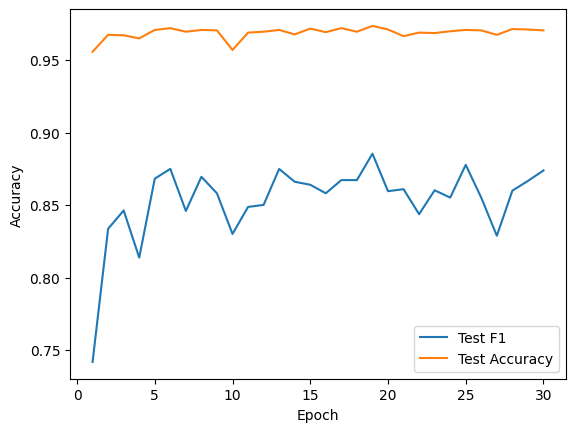

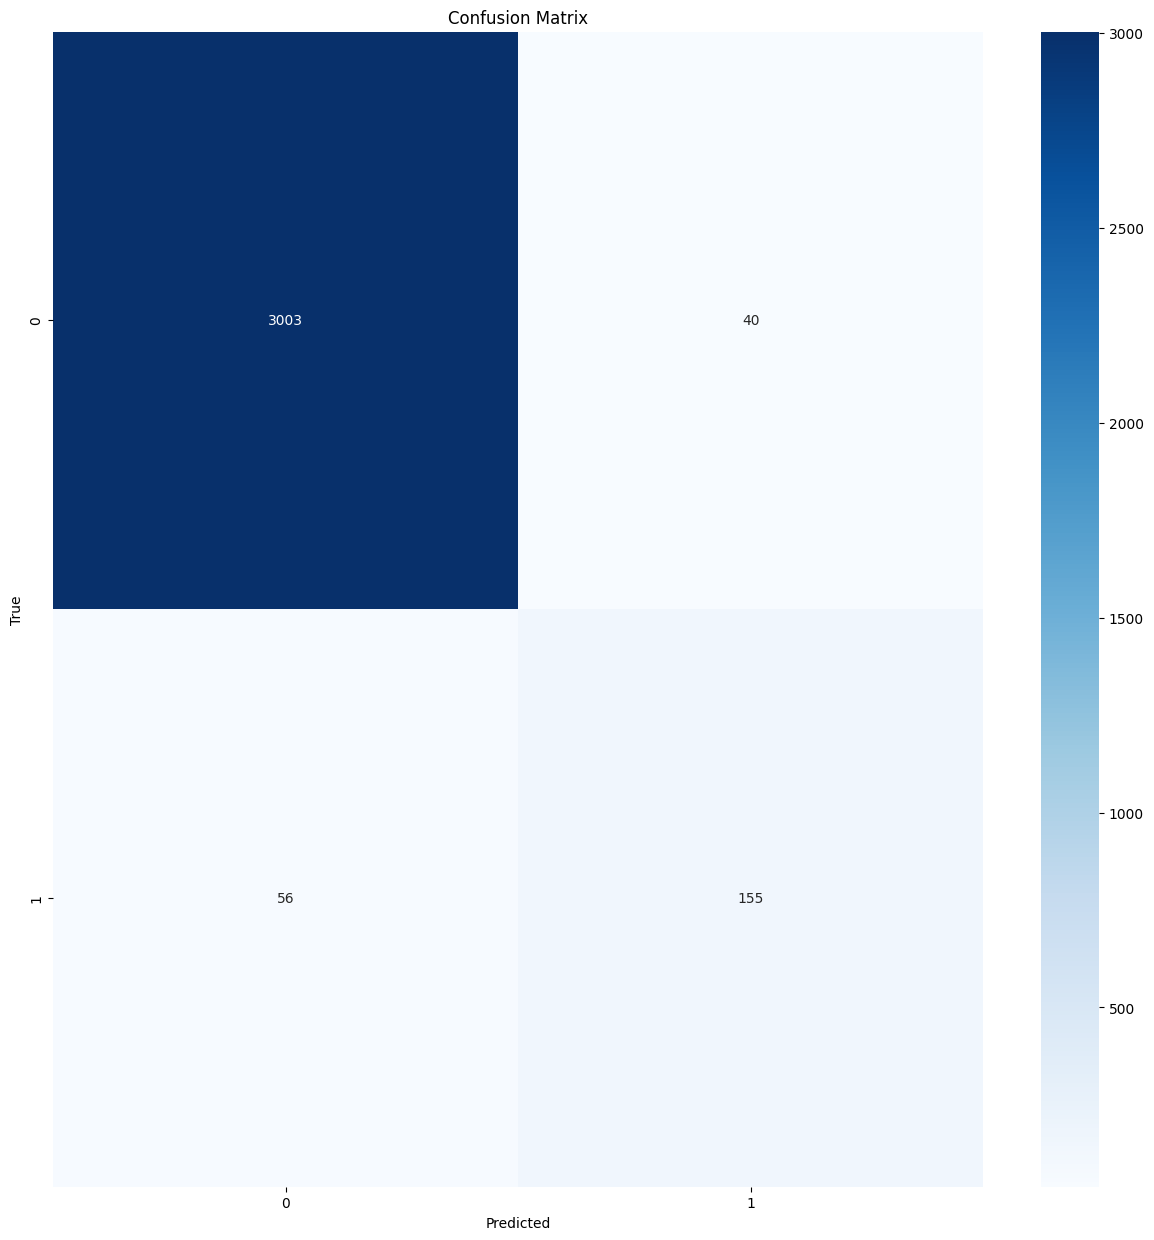

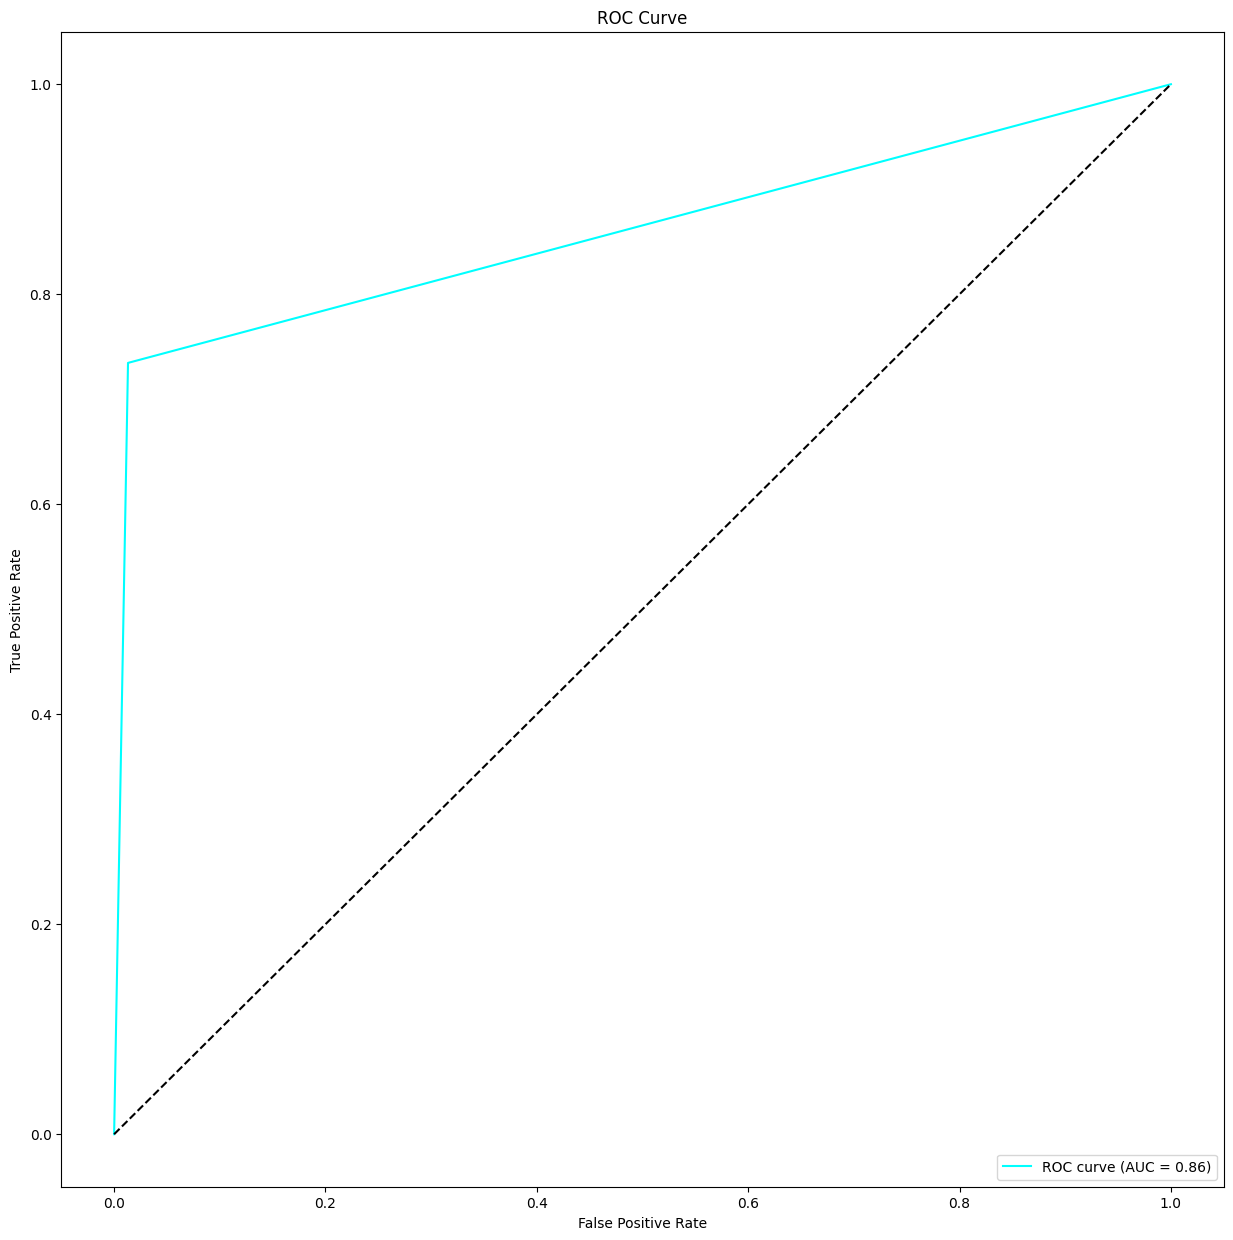

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      3043
         1.0       0.79      0.73      0.76       211

    accuracy                           0.97      3254
   macro avg       0.89      0.86      0.87      3254
weighted avg       0.97      0.97      0.97      3254



In [6]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=30, multilabel=multilabel, report=True)

In [ ]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=30, multilabel=multilabel, report=True)

Training Late Fusion Model:
Model Memory Usage: 0.25 MB
The number of parameters of the model are: 66049


STAGE:2024-02-09 05:15:16 44475:44475 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/30 - Test Accuracy: 0.9665, macro-f1: 0.8265
Epoch 1/30 - Training Time: 1.82 seconds | Inference Time: 0.53 seconds
Epoch 2/30 - Test Accuracy: 0.9647, macro-f1: 0.8201
Epoch 2/30 - Training Time: 1.73 seconds | Inference Time: 0.48 seconds
Epoch 3/30 - Test Accuracy: 0.9613, macro-f1: 0.8404
Epoch 3/30 - Training Time: 1.63 seconds | Inference Time: 0.52 seconds
Epoch 4/30 - Test Accuracy: 0.9699, macro-f1: 0.8559
Epoch 4/30 - Training Time: 1.68 seconds | Inference Time: 0.49 seconds
Epoch 5/30 - Test Accuracy: 0.9693, macro-f1: 0.8482
Epoch 5/30 - Training Time: 1.63 seconds | Inference Time: 0.49 seconds
Epoch 6/30 - Test Accuracy: 0.9662, macro-f1: 0.8224
Epoch 6/30 - Training Time: 1.68 seconds | Inference Time: 0.48 seconds
Epoch 7/30 - Test Accuracy: 0.9677, macro-f1: 0.8310
Epoch 7/30 - Training Time: 1.76 seconds | Inference Time: 0.50 seconds
Epoch 8/30 - Test Accuracy: 0.9683, macro-f1: 0.8379
Epoch 8/30 - Training Time: 1.66 seconds | Inference Time: 0.46 seconds


STAGE:2024-02-09 05:16:29 44475:44475 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-09 05:16:29 44475:44475 ActivityProfilerController.cpp:322] Completed Stage: Post Processing
